In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_reg import load_data, evaluate

## Import data from train.txt and test.txt

In [2]:
x_train, y_train = load_data('train.txt')
x_test, y_test = load_data('test.txt')

In [3]:
x_train.shape

(300,)

## Plot the training set and the test set

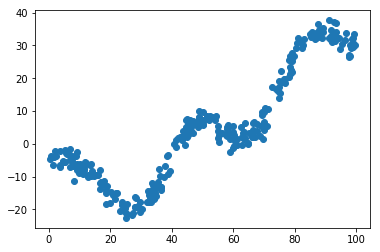

In [4]:
plt.scatter(x_train, y_train)
plt.show()

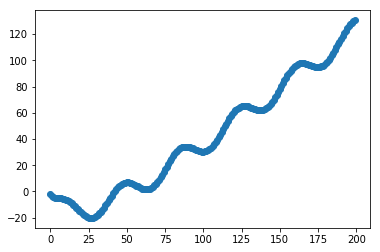

In [5]:
plt.scatter(x_test, y_test)
plt.show()

## Test the data on different models

In [1]:
from base import *
import numpy as np
import matplotlib.pyplot as plt
from linear_reg import load_data, evaluate
from linear_reg_jsx import linear_regression

**Define the test functions**
记得一定要在判断条件那里加上对应的模型名字，如果模型不在提供的范围内，则直接 `throw Exception`

In [2]:
def test(model, lr, epochs, n=2, l2=0):
    
    assert type(model) is str
    
    train_file = 'train.txt'
    test_file = 'test.txt'

    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
#     f = main(x_train, y_train)
    if model == 'power':
        f = power(x_train, y_train, n=n, epochs=epochs, Print=False, learning_rate=lr, l2=l2)
    elif model == 'gaussian':
        f = gaussian(x_train, y_train, n=n, epochs=epochs, Print=False, learning_rate=lr, l2=0)
    elif model == 'sigmoid':
        f = sigmoid_base(x_train, y_train, n=n, epochs=epochs, Print=False, learning_rate=lr, l2=0)
    elif model == 'mix':
        f = mix(x_train, y_train, epochs=epochs, Print=True, learning_rate=lr, l2=0)
    elif model == 'jin':
        f = linear_regression(x_train, y_train, epochs=epochs, learning_rate=lr, poly=n, l2=l2)
    else:
        raise Exception

    # 计算预测的输出值
    y_test_pred = f(x_test)

    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    # 显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

### Polynomial base functions

For this question, the learning rate should not be too large, say 0.001, otherwise, this alg diverge; or I can norm the input first.

(300,)
(200,)
预测值与真实值的标准差：8.6


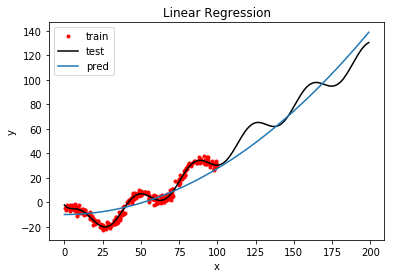

In [3]:
test('power', lr=1e-8, n=2, epochs=1000, l2=5e-2)

## Gaussian base functions

### n = 1

(300,)
(200,)
Cost after 0 iterations : 148.2751737565079
Cost after 10000 iterations : 116.16767689949832
Cost after 20000 iterations : 88.70740164250665
Cost after 30000 iterations : 50.99136280591392
Cost after 40000 iterations : 36.393657903520094
Cost after 50000 iterations : 31.29955415435575
Cost after 60000 iterations : 28.915725362444228
Cost after 70000 iterations : 27.5130005411543
Cost after 80000 iterations : 26.563744256359843
Cost after 90000 iterations : 25.85990186373707
Cost after 100000 iterations : 25.291452007224215
Cost after 110000 iterations : 24.791940247678205
Cost after 120000 iterations : 24.31672826708076
Cost after 130000 iterations : 23.826770255367165
Cost after 140000 iterations : 23.24217233000733
Cost after 150000 iterations : 22.376228382464454
Cost after 160000 iterations : 21.24170922491408
Cost after 170000 iterations : 20.009641194353502
Cost after 180000 iterations : 18.5480831719649
Cost after 190000 iterations : 16.811765002128904
Cost after 2

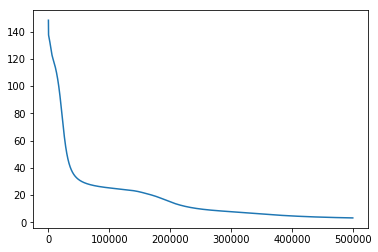

预测值与真实值的标准差：67.9


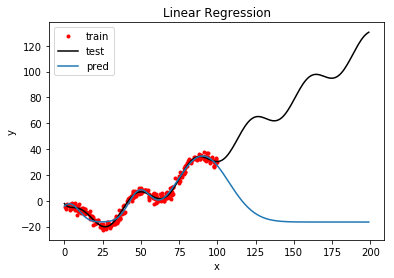

In [10]:
test('gaussian', lr=1e-2, n=3, epochs=500000, l2=0)

## Sigmoid base functions

(300,)
(200,)
Cost after 0 iterations : 125.8563290292835


/Users/chrisea/prml/lab1/base.py:236: RuntimeWarning: overflow encountered in exp
  a = 1. / (1 + np.exp(-z))


Cost after 10000 iterations : 1.8094176782297982
Cost after 20000 iterations : 1.73702893359699
Cost after 30000 iterations : 1.6920715540848852
Cost after 40000 iterations : 1.6605557045767452
Cost after 50000 iterations : 1.6372332941389898
Cost after 60000 iterations : 1.6186848558097835
Cost after 70000 iterations : 1.6015839213847392
Cost after 80000 iterations : 1.5821154312359362


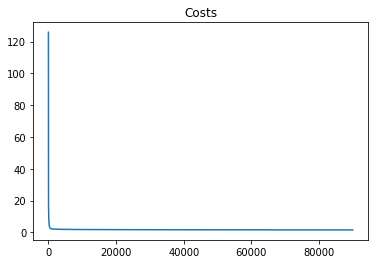

预测值与真实值的标准差：39.1


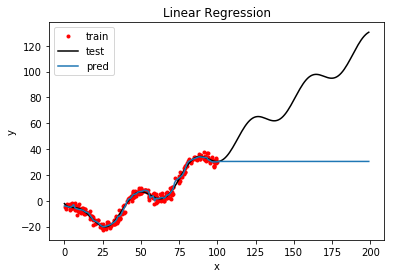

In [6]:
test('sigmoid', lr=1e-2, n=10, epochs=90000, l2=0)

<table border="1">
    <tr>
        <td> <center> model </center> </td>
        <td> <center> hyperparameter </center> </td>
        <td> <center> std </center> </td>
    </tr>
    <tr>
        <td> power base, n = 1 </td>
        <td> learning rate = 1e-4 </td>
        <td> 20.7 </td>
    </tr>
    <tr>
        <td> power base, n = 2 </td>
        <td> learning rate = 1e-7, l2_lambda = 5e-4</td>
        <td> 9.4 </td>
    </tr>
    <tr>
        <td> power base, n = 3 </td>
        <td> learning rate = 1e-11, l2_lambda = 0.5 </td>
        <td> 29.5 </td>
    </tr>
</table>


## Mix base with power-2 and sin

(300,)
(200,)
Cost after 0 iterations : 320.32891592607757
Cost after 10000 iterations : 53.59852289824006
Cost after 20000 iterations : 33.064386521967364
Cost after 30000 iterations : 27.57444251191154
Cost after 40000 iterations : 24.683831892752362
Cost after 50000 iterations : 22.735551680472017
Cost after 60000 iterations : 21.35648838649703
Cost after 70000 iterations : 20.37217332555699
Cost after 80000 iterations : 19.668522312719627
Cost after 90000 iterations : 19.165255350867703
Cost after 100000 iterations : 18.8051603365613
Cost after 110000 iterations : 18.54737677871558
Cost after 120000 iterations : 18.362710271825353
Cost after 130000 iterations : 18.230299201345836
Cost after 140000 iterations : 18.13523541923472
Cost after 150000 iterations : 18.066864747361368
Cost after 160000 iterations : 18.017572831129122
Cost after 170000 iterations : 17.981917646010487
Cost after 180000 iterations : 17.956009636438733
Cost after 190000 iterations : 17.93706877085467


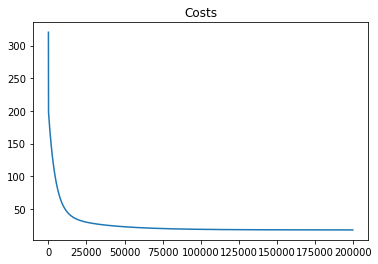

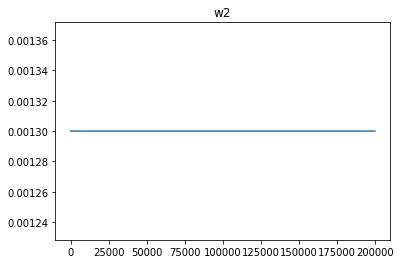

19.0
预测值与真实值的标准差：5.0


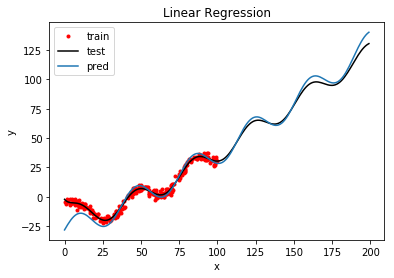

In [5]:
test('mix', lr=1e-5, epochs=200000, l2=0)